# Audible Data Cleaning Process

In [516]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [517]:
df = pd.read_csv('./audible_uncleaned.csv')

In [518]:
df

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,Writtenby:ChrisStewart,Narratedby:ChrisStewart,7 hrs and 34 mins,09-03-17,English,Not rated yet,596.00
87485,The Alps,Writtenby:StephenO'Shea,Narratedby:RobertFass,10 hrs and 7 mins,21-02-17,English,Not rated yet,820.00
87486,The Innocents Abroad,Writtenby:MarkTwain,Narratedby:FloGibson,19 hrs and 4 mins,30-12-16,English,Not rated yet,938.00
87487,A Sentimental Journey,Writtenby:LaurenceSterne,Narratedby:AntonLesser,4 hrs and 8 mins,23-02-11,English,Not rated yet,680.00


In [519]:
df.shape

(87489, 8)

In [520]:
df.size

699912

In [521]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB


In [522]:
df.describe()

,name,author,narrator,time,releasedate,language,stars,price
count,87489,87489,87489,87489,87489,87489,87489,87489
unique,82767,48374,29717,2284,5058,36,665,1011
top,The Art of War,"Writtenby:矢島雅弘,石橋遊",Narratedby:anonymous,2 mins,16-05-18,English,Not rated yet,586.00
freq,20,874,1034,372,773,61884,72417,5533


In [523]:
df['name'].unique()

array(['Geronimo Stilton #11 & #12', 'The Burning Maze', 'The Deep End',
       ..., 'The Alps', 'A Sentimental Journey', 'Havana'], dtype=object)

In [524]:
df['author'] = df['author'].str.replace('Writtenby:', '')

In [525]:
import re

def split_names(name):
    pattern = re.compile(r'([a-z])([A-Z])')
    split_name = re.sub(pattern, r'\1 \2', name)
    return split_name

In [526]:
df['author'] = df['author'].apply(split_names)

In [527]:
df['narrator'] = df['narrator'].str.replace('Narratedby:', '')

In [528]:
df['narrator'] = df['narrator'].apply(split_names)

In [529]:
df['narrator'] = df['narrator'].str.replace(',', ', ')
df['author'] = df['author'].str.replace(',', ', ')

In [530]:
df['time'].unique()

array(['2 hrs and 20 mins', '13 hrs and 8 mins', '2 hrs and 3 mins', ...,
       '40 hrs and 58 mins', '24 hrs and 8 mins', '24 hrs and 4 mins'],
      dtype=object)

In [531]:
df.loc[~df['time'].str.contains('hr'), 'time'] = df.loc[~df['time'].str.contains('hr'), 'time'].str.replace('^[1-9]', '0 hrs and ', regex=True)
df.loc[df['time'].str.contains('Less than'), 'time'] = "0 hr and 1 min"

In [532]:
df[['Hours', 'Minutes']] = df['time'].str.split(' and ', expand=True)

In [533]:
df['Hours'] = df['Hours'].str.replace(' hrs', '')
df['Hours'] = df['Hours'].str.replace(' hr', '')
df['Minutes'] = df['Minutes'].str.replace(' mins', '')
df['Minutes'] = df['Minutes'].str.replace(' min', '')
df['Minutes'] = df['Minutes'].str.replace('Less than ', '')
df['Minutes'] = df['Minutes'].str.replace(' minute', '')

df['Minutes'] = pd.to_numeric(df['Minutes'])
df['Hours'] = pd.to_numeric(df['Hours'])

In [534]:
df[['Hours', 'Minutes']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Hours    87489 non-null  int64  
 1   Minutes  83147 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.3 MB


In [535]:
df['Minutes'] = df['Minutes'].fillna(0)

In [536]:
df['Hrs_to_Mins'] = df['Hours'] * 60

In [537]:
df['Minutes'] = df['Minutes'] + df['Hrs_to_Mins']

In [538]:
df.loc[df['Minutes'].isna(), 'Minutes'].count()

0

In [539]:
df['releasedate'] = pd.to_datetime(df['releasedate'], format='%d-%m-%y')

In [540]:
df['language'] = df['language'].str.title()

In [541]:
df['stars'].unique()

array(['5 out of 5 stars34 ratings', '4.5 out of 5 stars41 ratings',
       '4.5 out of 5 stars38 ratings', '4.5 out of 5 stars12 ratings',
       '4.5 out of 5 stars181 ratings', '5 out of 5 stars72 ratings',
       '5 out of 5 stars11 ratings', '5 out of 5 stars50 ratings',
       '5 out of 5 stars5 ratings', '5 out of 5 stars58 ratings',
       '4.5 out of 5 stars130 ratings', '5 out of 5 stars6 ratings',
       '5 out of 5 stars7 ratings', '5 out of 5 stars41 ratings',
       '4 out of 5 stars2 ratings', '4.5 out of 5 stars33 ratings',
       '5 out of 5 stars20 ratings', '5 out of 5 stars13 ratings',
       '5 out of 5 stars79 ratings', '4.5 out of 5 stars47 ratings',
       '5 out of 5 stars27 ratings', '4.5 out of 5 stars25 ratings',
       '5 out of 5 stars101 ratings', '5 out of 5 stars15 ratings',
       '5 out of 5 stars3 ratings', '5 out of 5 stars18 ratings',
       '4.5 out of 5 stars37 ratings', '5 out of 5 stars9 ratings',
       '5 out of 5 stars8 ratings', 'Not rated 

In [542]:
df[['Rating', 'No_of_Ratings']] = df['stars'].str.split(' stars', expand=True)

df[['Rating', 'No_of_Ratings']]

,Rating,No_of_Ratings
0,5 out of 5,34 ratings
1,4.5 out of 5,41 ratings
2,4.5 out of 5,38 ratings
3,4.5 out of 5,12 ratings
4,4.5 out of 5,181 ratings
...,...,...
87484,Not rated yet,None
87485,Not rated yet,None
87486,Not rated yet,None
87487,Not rated yet,None


In [543]:
df['Rating'] = df['Rating'].str.replace(' out of 5', '')
df['No_of_Ratings'] = df['No_of_Ratings'].str.replace(' ratings', '')
df['No_of_Ratings'] = df['No_of_Ratings'].str.replace(' rating', '')
df['No_of_Ratings'] = df['No_of_Ratings'].str.replace(',', '')

In [544]:
df['No_of_Ratings'].unique()

array(['34', '41', '38', '12', '181', '72', '11', '50', '5', '58', '130',
       '6', '7', '2', '33', '20', '13', '79', '47', '27', '25', '101',
       '15', '3', '18', '37', '9', '8', None, '10', '28', '19', '16', '4',
       '17', '1', '14', '21', '81', '57', '91', '100', '31', '51', '26',
       '32', '53', '52', '93', '46', '24', '96', '1423', '636', '720',
       '1006', '572', '664', '39', '845', '64', '141', '40', '35', '23',
       '43', '67', '266', '174', '86', '29', '188', '105', '65', '30',
       '63', '62', '113', '59', '77', '329', '55', '154', '61', '22',
       '90', '69', '136', '94', '206', '82', '164', '66', '75', '319',
       '233', '48', '85', '78', '56', '193', '591', '1216', '112', '103',
       '49', '137', '315', '396', '83', '219', '258', '36', '45', '169',
       '287', '148', '42', '213', '114', '131', '107', '121', '134', '95',
       '519', '159', '1823', '102', '382', '71', '1636', '68', '856',
       '538', '735', '619', '2161', '562', '819', '232', '1

In [545]:
df['Rating'].unique()

array(['5', '4.5', '4', 'Not rated yet', '3.5', '3', '1', '2', '2.5',
       '1.5'], dtype=object)

In [546]:
df['Rating'] = df['Rating'].replace('Not rated yet', np.nan)

df['Rating'].unique()

array(['5', '4.5', '4', nan, '3.5', '3', '1', '2', '2.5', '1.5'],
      dtype=object)

In [547]:
df['Rating'] = pd.to_numeric(df['Rating'])
df['No_of_Ratings'] = pd.to_numeric(df['No_of_Ratings'])

df[['Rating', 'No_of_Ratings']]

,Rating,No_of_Ratings
0,5.0,34.0
1,4.5,41.0
2,4.5,38.0
3,4.5,12.0
4,4.5,181.0
...,...,...
87484,NaN,NaN
87485,NaN,NaN
87486,NaN,NaN
87487,NaN,NaN


In [548]:
df['No_of_Ratings'] = df['No_of_Ratings'].fillna(0)
df['Rating'] = df['Rating'].fillna(0)

In [549]:
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].str.replace('Free', '')

df['price'] = pd.to_numeric(df['price'])

In [550]:
df['price'] = df['price'].fillna(df['price'].mean())

In [551]:
df

,name,author,narrator,time,releasedate,language,stars,price,Hours,Minutes,Hrs_to_Mins,Rating,No_of_Ratings
0,Geronimo Stilton #11 & #12,Geronimo Stilton,Bill Lobely,2 hrs and 20 mins,2008-08-04,English,5 out of 5 stars34 ratings,468.0,2,140.0,120,5.0,34.0
1,The Burning Maze,Rick Riordan,Robbie Daymond,13 hrs and 8 mins,2018-05-01,English,4.5 out of 5 stars41 ratings,820.0,13,788.0,780,4.5,41.0
2,The Deep End,Jeff Kinney,Dan Russell,2 hrs and 3 mins,2020-11-06,English,4.5 out of 5 stars38 ratings,410.0,2,123.0,120,4.5,38.0
3,Daughter of the Deep,Rick Riordan,Soneela Nankani,11 hrs and 16 mins,2021-10-05,English,4.5 out of 5 stars12 ratings,615.0,11,676.0,660,4.5,12.0
4,"The Lightning Thief: Percy Jackson, Book 1",Rick Riordan,Jesse Bernstein,10 hrs,2010-01-13,English,4.5 out of 5 stars181 ratings,820.0,10,600.0,600,4.5,181.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,Chris Stewart,Chris Stewart,7 hrs and 34 mins,2017-03-09,English,Not rated yet,596.0,7,454.0,420,0.0,0.0
87485,The Alps,Stephen O'Shea,Robert Fass,10 hrs and 7 mins,2017-02-21,English,Not rated yet,820.0,10,607.0,600,0.0,0.0
87486,The Innocents Abroad,Mark Twain,Flo Gibson,19 hrs and 4 mins,2016-12-30,English,Not rated yet,938.0,19,1144.0,1140,0.0,0.0
87487,A Sentimental Journey,Laurence Sterne,Anton Lesser,4 hrs and 8 mins,2011-02-23,English,Not rated yet,680.0,4,248.0,240,0.0,0.0


In [552]:
df = df.drop(columns=['time', 'stars', 'Hours', 'Hrs_to_Mins'])

df

,name,author,narrator,releasedate,language,price,Minutes,Rating,No_of_Ratings
0,Geronimo Stilton #11 & #12,Geronimo Stilton,Bill Lobely,2008-08-04,English,468.0,140.0,5.0,34.0
1,The Burning Maze,Rick Riordan,Robbie Daymond,2018-05-01,English,820.0,788.0,4.5,41.0
2,The Deep End,Jeff Kinney,Dan Russell,2020-11-06,English,410.0,123.0,4.5,38.0
3,Daughter of the Deep,Rick Riordan,Soneela Nankani,2021-10-05,English,615.0,676.0,4.5,12.0
4,"The Lightning Thief: Percy Jackson, Book 1",Rick Riordan,Jesse Bernstein,2010-01-13,English,820.0,600.0,4.5,181.0
...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,Chris Stewart,Chris Stewart,2017-03-09,English,596.0,454.0,0.0,0.0
87485,The Alps,Stephen O'Shea,Robert Fass,2017-02-21,English,820.0,607.0,0.0,0.0
87486,The Innocents Abroad,Mark Twain,Flo Gibson,2016-12-30,English,938.0,1144.0,0.0,0.0
87487,A Sentimental Journey,Laurence Sterne,Anton Lesser,2011-02-23,English,680.0,248.0,0.0,0.0


In [553]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   name           87489 non-null  object        
 1   author         87489 non-null  object        
 2   narrator       87489 non-null  object        
 3   releasedate    87489 non-null  datetime64[ns]
 4   language       87489 non-null  object        
 5   price          87489 non-null  float64       
 6   Minutes        87489 non-null  float64       
 7   Rating         87489 non-null  float64       
 8   No_of_Ratings  87489 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 6.0+ MB


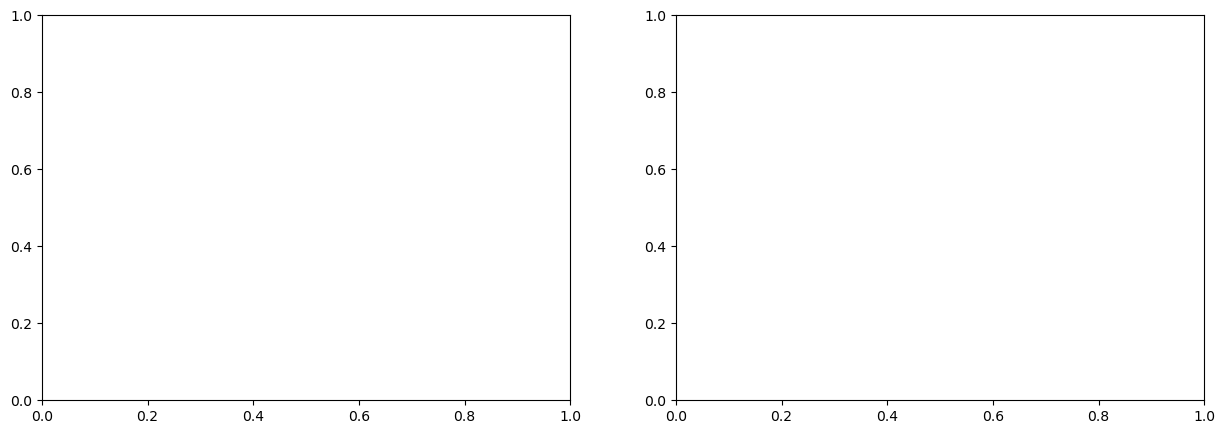

In [554]:
price_obj1 = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

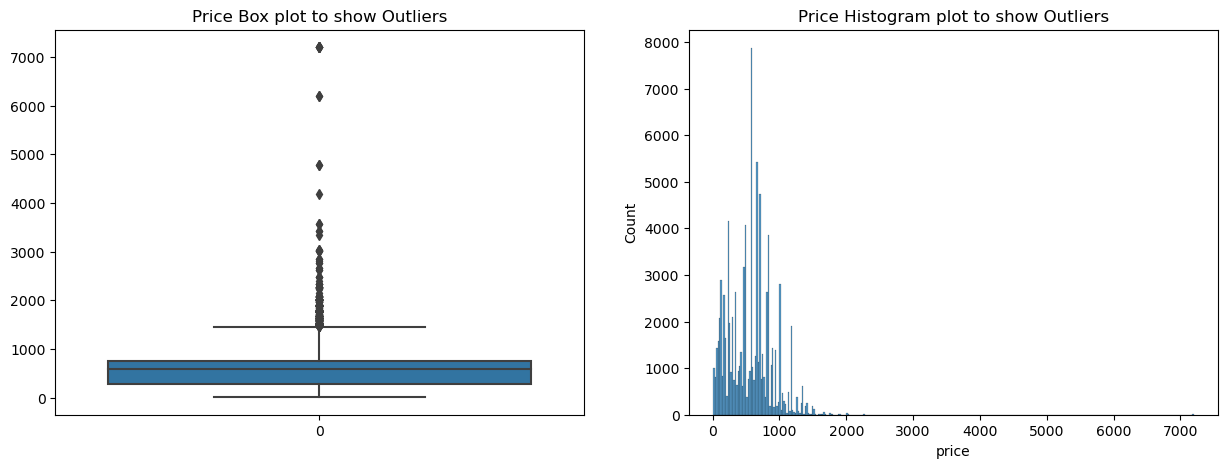

In [555]:
fig, (ax1, ax2) = price_obj1

sns.boxplot(df['price'], ax=ax1)
ax1.set_title('Price Box plot to show Outliers')
sns.histplot(df['price'], ax=ax2)
ax2.set_title('Price Histogram plot to show Outliers')

fig

In [556]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)

iqr = q3-q1

In [557]:
ulim = q3 + (1.5 * iqr)
llim = q1 - (1.5 * iqr)

In [558]:
df.loc[(df['price'] <= llim) | (df['price'] >= ulim)]

,name,author,narrator,releasedate,language,price,Minutes,Rating,No_of_Ratings
2940,She Persisted Audio Collection: Volume 1,"Chelsea Clinton, Andrea Davis Pinkney, Lesa Cl...","Bahni Turpin, Janina Edwards, Carolyn King,",2021-08-24,English,1507.0,289.0,0.0,0.0
4900,児童文学名作選,"太田治子, 石原広子, 佐藤修","石原広子, 飯田明子, 石橋みや子,",2021-08-05,Japanese,3348.0,448.0,0.0,0.0
5167,Oracles of Delphi Keep,Victoria Laurie,Susan Duerden,2009-05-26,English,1507.0,1005.0,0.0,0.0
5513,せかい伝記図書館 全集,いずみ書房,"茶川亜郎, 松岡正美",2021-02-18,Japanese,4783.0,3357.0,0.0,0.0
5516,せかい童話図書館 全集,いずみ書房,"原みゆき, 城山森人",2021-02-18,Japanese,4783.0,853.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
86200,India: A Million Mutinies Now,V.S.Naipaul,Sam Dastor,2021-07-27,English,1523.0,1486.0,5.0,14.0
86364,The Innocents Abroad,Mark Twain,Robin Field,2010-09-20,English,1640.0,1444.0,5.0,1.0
86796,"Warpath and Bivouac, or the Conquest of the Sioux",John Finerty,Johann Zeiger,2020-03-21,English,1594.0,636.0,0.0,0.0
86918,The Braided River,Samrat Choudhury,Ranjit Madgavkar,2021-12-22,English,1575.0,779.0,5.0,1.0


In [559]:
new_df = df.copy()

new_df.loc[new_df['price'] > ulim, 'price'] = ulim
new_df.loc[new_df['price'] < llim, 'price'] = llim

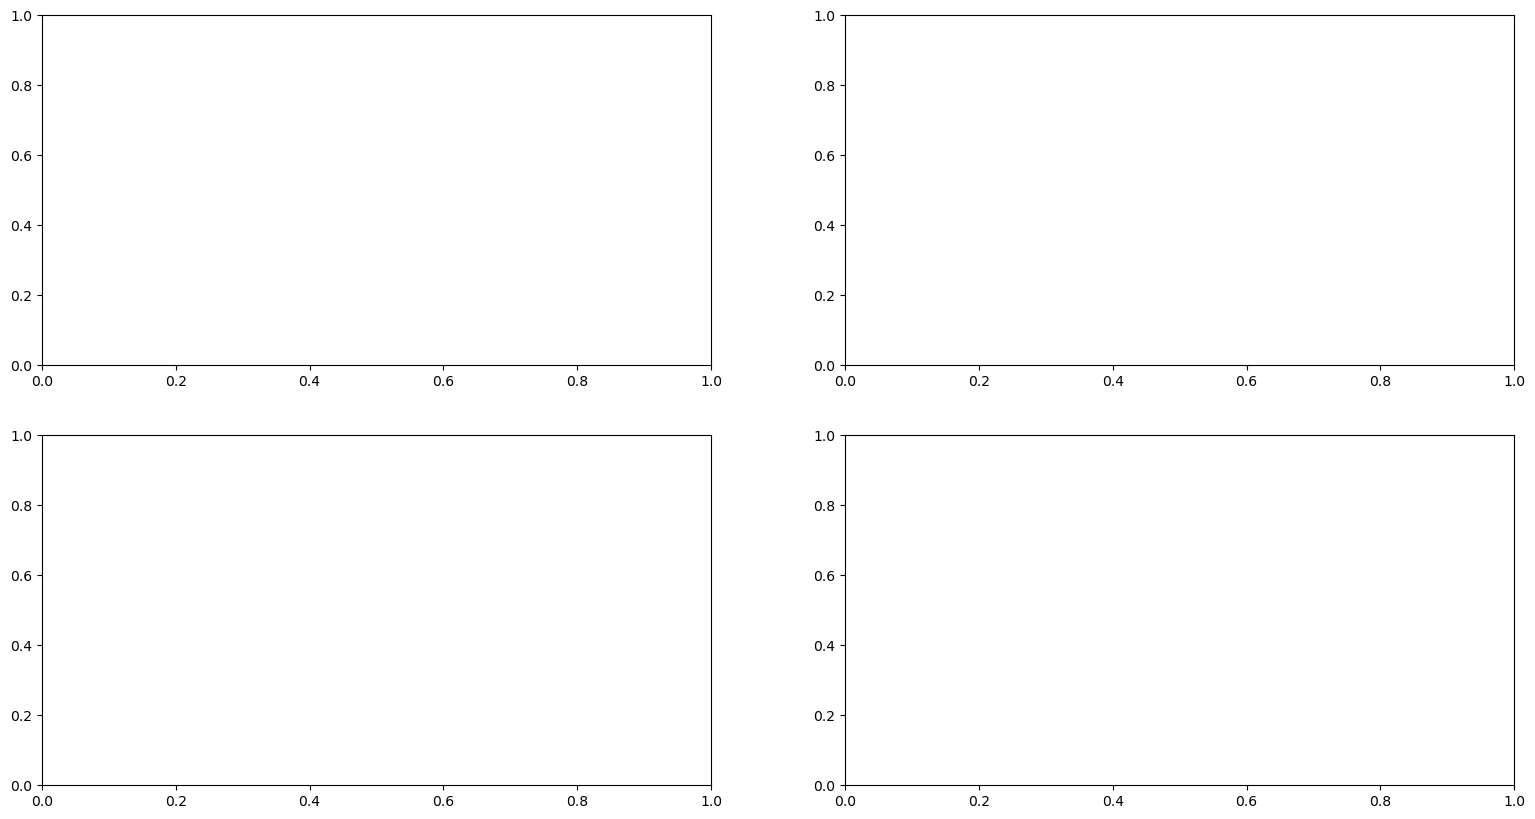

In [560]:
price_obj2 = plt.subplots(nrows=2, ncols=2, figsize=(19, 10))

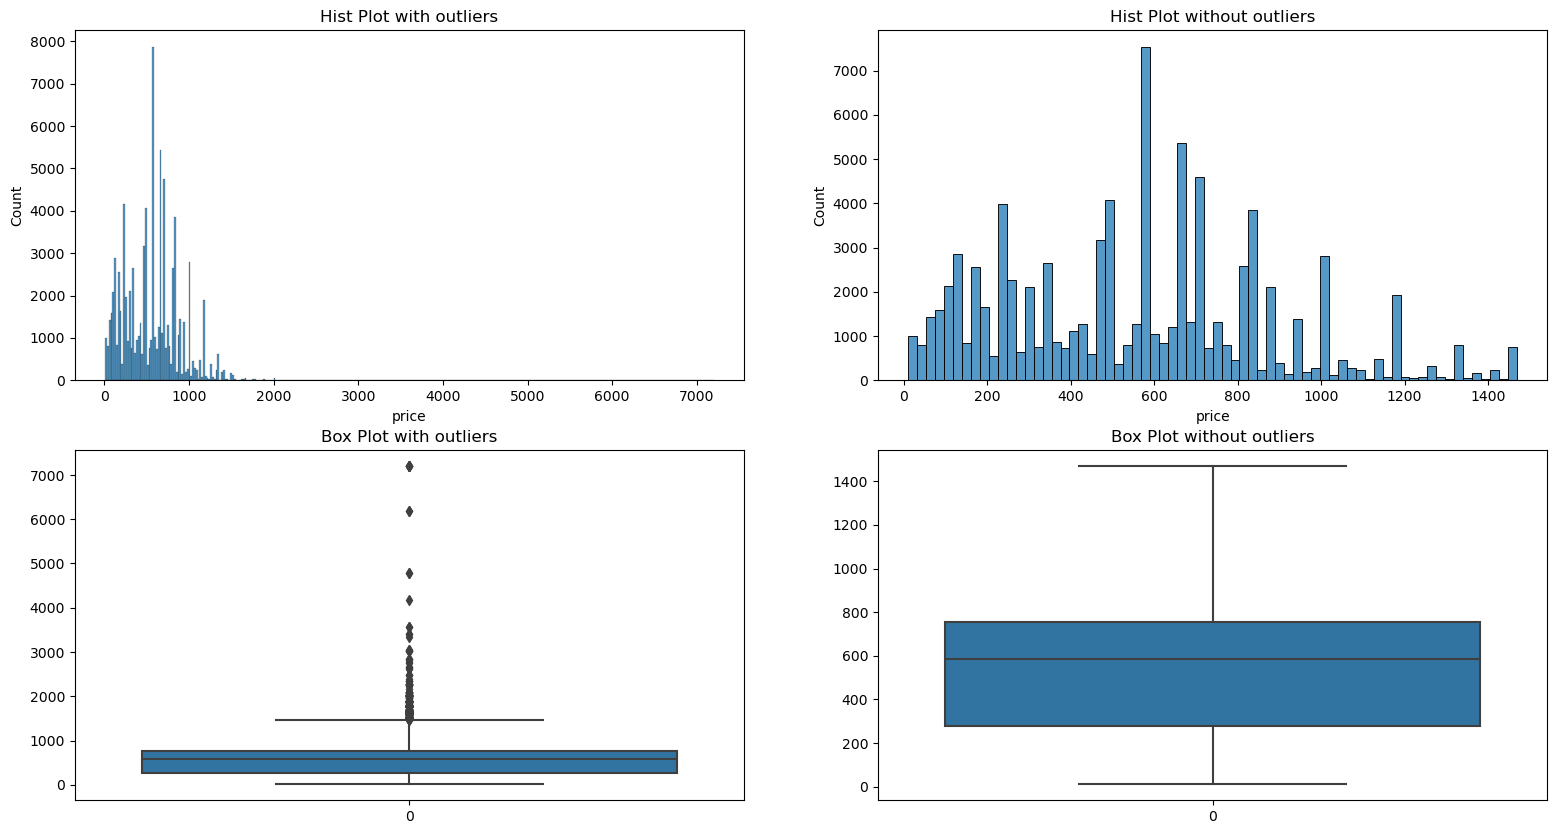

In [561]:
fig, ((ax1, ax2), (ax3, ax4)) = price_obj2

sns.histplot(df['price'], ax=ax1)
ax1.set_title('Hist Plot with outliers')
sns.histplot(new_df['price'], ax=ax2)
ax2.set_title('Hist Plot without outliers')
sns.boxplot(df['price'], ax=ax3)
ax3.set_title('Box Plot with outliers')
sns.boxplot(new_df['price'], ax=ax4)
ax4.set_title('Box Plot without outliers')

fig

In [562]:
df = new_df.copy()

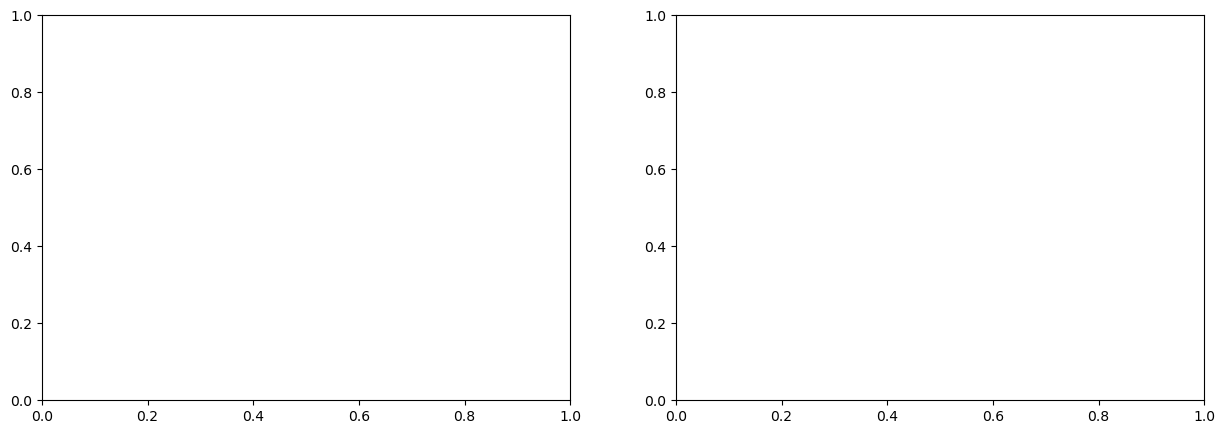

In [563]:
min_obj1 = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

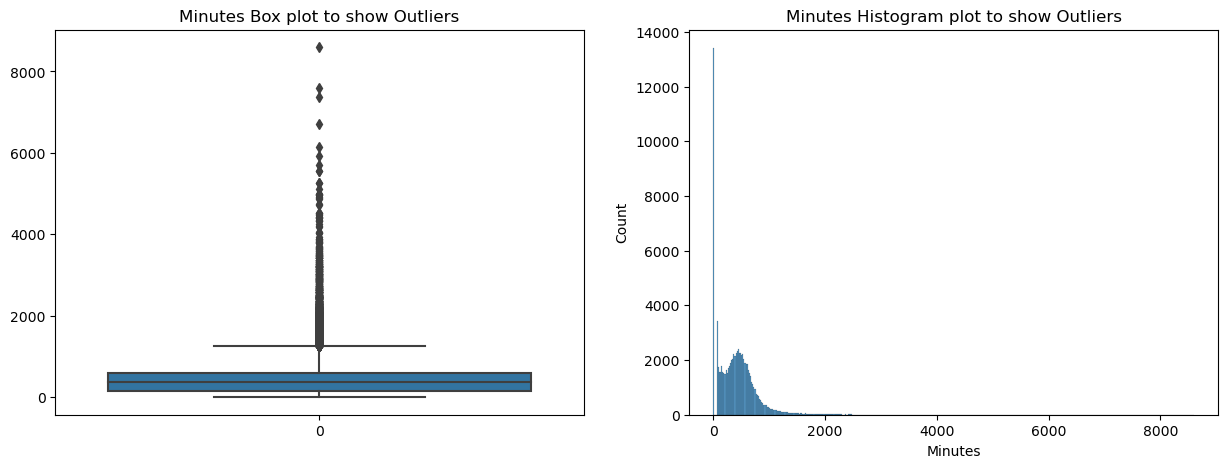

In [564]:
fig, (ax1, ax2) = min_obj1

sns.boxplot(df['Minutes'], ax=ax1)
ax1.set_title('Minutes Box plot to show Outliers')
sns.histplot(df['Minutes'], ax=ax2)
ax2.set_title('Minutes Histogram plot to show Outliers')

fig

In [565]:
q1 = df['Minutes'].quantile(0.25)
q3 = df['Minutes'].quantile(0.75)

iqr = q3-q1

In [566]:
ulim = q3 + (1.5 * iqr)
llim = q1 - (1.5 * iqr)

In [567]:
df.loc[(df['Minutes'] <= llim) | (df['Minutes'] >= ulim)]

,name,author,narrator,releasedate,language,price,Minutes,Rating,No_of_Ratings
21,"Eldest: The Inheritance Cycle, Book 2",Christopher Paolini,Gerrard Doyle,2009-04-14,English,957.0,1409.0,4.5,47.0
44,Flashback,Shannon Messenger,Caitlin Kelly,2018-12-11,English,1170.0,1389.0,5.0,12.0
56,Legacy,Shannon Messenger,Caitlin Kelly,2019-11-05,English,1170.0,1375.0,5.0,14.0
880,Nightfall,Shannon Messenger,Caitlin Kelly,2018-11-06,English,1170.0,1252.0,5.0,14.0
1420,Bedtime Stories for Kids: Collection of Medita...,"Amanda Dreams, Nicole Fairy","Mandy Fisher, Krystal Wascher",2020-12-01,English,1003.0,1571.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...
86245,チベット旅行記,河口慧海,野口晃,2018-08-26,Japanese,1395.0,1975.0,0.0,0.0
86364,The Innocents Abroad,Mark Twain,Robin Field,2010-09-20,English,1469.0,1444.0,5.0,1.0
86852,Roads to Quoz,William Least Heat-Moon,William Least Heat-Moon,2008-10-29,English,500.0,1261.0,0.0,0.0
86961,Ghost Train to the Eastern Star,Paul Theroux,John Mc Donough,2009-03-06,English,1138.0,1495.0,0.0,0.0


In [568]:
new_df = df.copy()

new_df.loc[new_df['Minutes'] > ulim, 'Minutes'] = ulim
new_df.loc[new_df['Minutes'] < llim, 'Minutes'] = llim

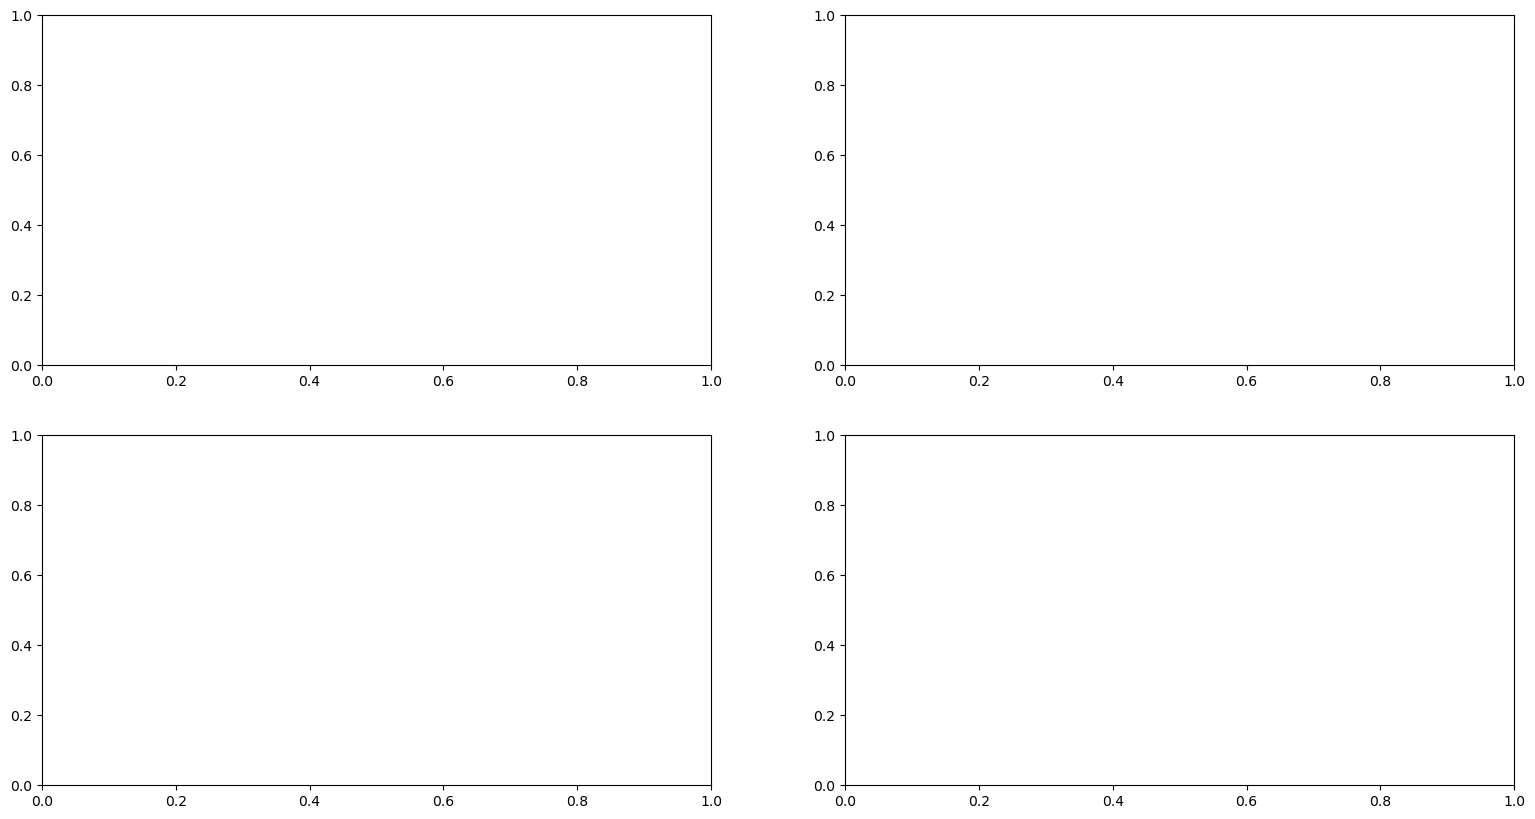

In [569]:
min_obj2 = plt.subplots(nrows=2, ncols=2, figsize=(19, 10))

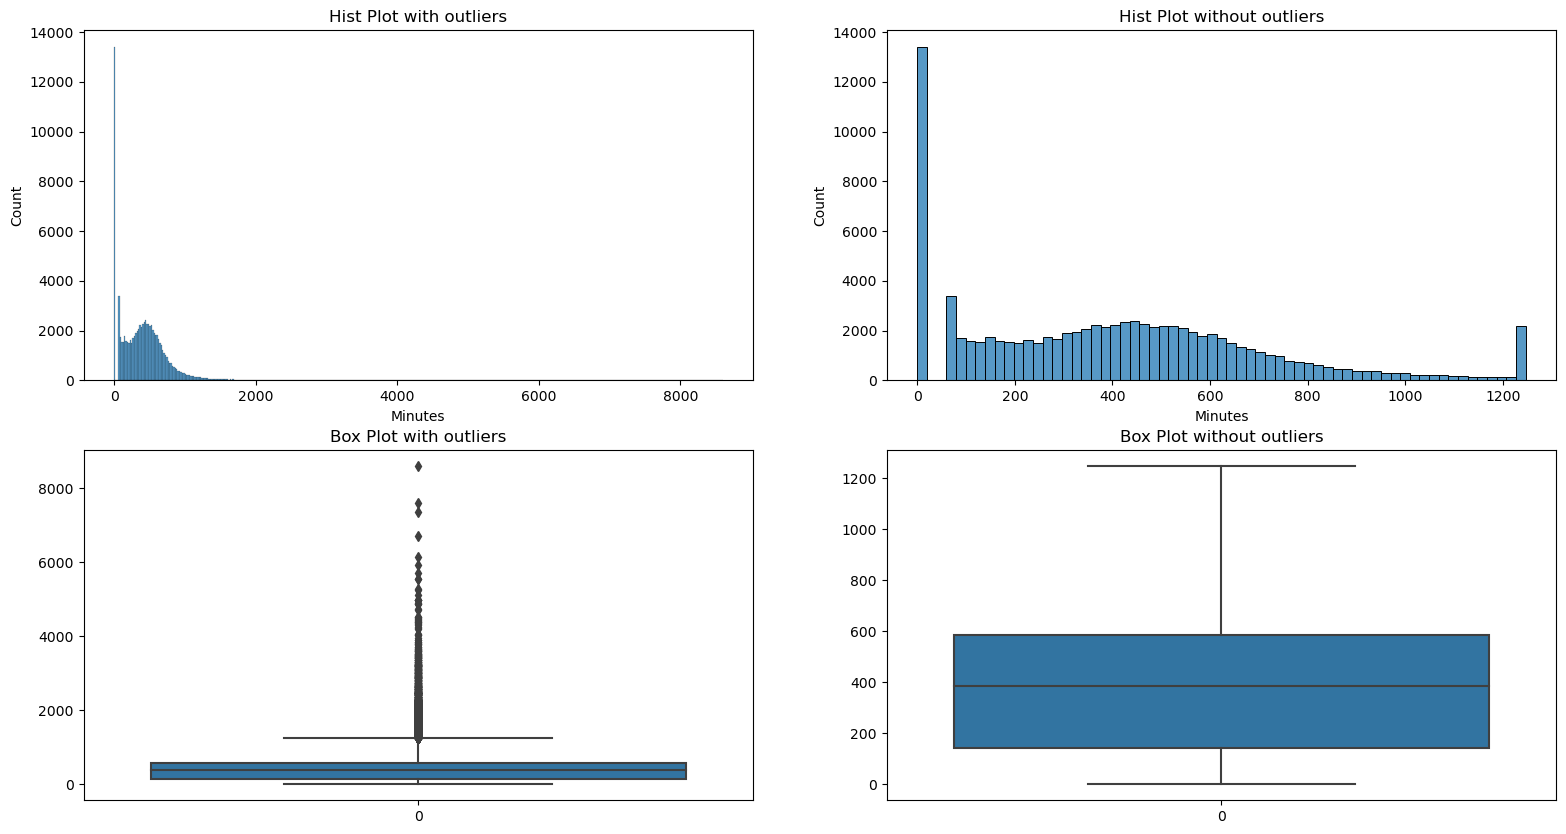

In [570]:
fig, ((ax1, ax2), (ax3, ax4)) = min_obj2

sns.histplot(df['Minutes'], ax=ax1)
ax1.set_title('Hist Plot with outliers')
sns.histplot(new_df['Minutes'], ax=ax2)
ax2.set_title('Hist Plot without outliers')
sns.boxplot(df['Minutes'], ax=ax3)
ax3.set_title('Box Plot with outliers')
sns.boxplot(new_df['Minutes'], ax=ax4)
ax4.set_title('Box Plot without outliers')

fig

In [571]:
df.to_csv('clean_audible.csv', index=False)